<h1>Feature Selection</h1>

<p> Finding relationships between features
<p>Feature selection using wrappers

Main source is from [Phd and Productivity](https://www.youtube.com/watch?v=iJ5c-XoHPFo&t=28s&ab_channel=PhDandProductivity)

Another sources on explaination: 
* [DataSchool](https://youtu.be/YaKMeAlHgqQ)
* [PyData](https://youtu.be/ioXKxulmwVQ)



<h2>What's the Purpose of Feature Selection</h2>
<p>Many learning algorithms perform poorly on high-dimensional data. This is known as the <b>curse of dimensionality</b>
    <p>There are other reasons we may wish to reduce the number of features including:
        <p>1. Reducing computational cost
            <p>2. Reducing the cost associated with data collection
                <p>3. Improving Interpretability

<h2>Dataset: Boston Housing Data</h2>

<p><b>Dependent Variable: MEDV:</b> Median value of owner-occupied homes in 1000's of dollars
<p><b>Explanatory Variables</b></p>
<p><b>CRIM:</b> per capita crime rate by town
<p><b>ZN:</b> proportion of residential land zoned for lots over 25,000 sq.ft.
<p><b>INDUS:</b> proportion of non-retail business acres per town
<p><b>CHAS:</b> Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
<p><b>NOX:</b> nitric oxides concentration (parts per 10 million)
<p><b>RM:</b> average number of rooms per dwelling
<p><b>AGE:</b> proportion of owner-occupied units built prior to 1940
<p><b>DIS:</b> weighted distances to five Boston employment centres
<p><b>RAD:</b> index of accessibility to radial highways
<p><b>TAX:</b> full-value property-tax rate per 10,000 dollars
<p><b>PTRATIO:</b>  pupil-teacher ratio by town
<p><b>B:</b> 1000(Bk - 0.63)^2 where Bk is the proportion of black residents by town
<p><b>LSTAT:</b> lower status of the population

In [1]:
from sklearn.datasets import load_boston
boston_data=load_boston()
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [2]:
import pandas as pd

boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
boston.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

CHAS and RAD seems to be categorical, as they have few labels. But CHAS has only 2 values, so we leave it. But we need do One hot encoding for RAD

In [3]:
boston['MEDV'] = boston_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
dummies = pd.get_dummies(boston.RAD)
dummies

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
501,1,0,0,0,0,0,0,0,0
502,1,0,0,0,0,0,0,0,0
503,1,0,0,0,0,0,0,0,0
504,1,0,0,0,0,0,0,0,0


In [8]:
boston = boston.drop(columns='RAD').merge(dummies,left_index=True,right_index=True)
X = boston.drop(columns='MEDV')
y = boston.MEDV

In [9]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222.0,18.7,...,28.7,0,0,1,0,0,0,0,0,0
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,311.0,15.2,...,22.9,0,0,0,0,1,0,0,0,0
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,311.0,15.2,...,27.1,0,0,0,0,1,0,0,0,0
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,311.0,15.2,...,16.5,0,0,0,0,1,0,0,0,0
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,311.0,15.2,...,18.9,0,0,0,0,1,0,0,0,0


## From KNN

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt

cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE: 5.39
R_squared: 0.66


<h2>Filter Features by Variance</h2>

In [13]:
boston.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
1.0            0.038039
2.0            0.045271
3.0            0.069597
4.0            0.170469
5.0            0.175968
6.0            0.048840
7.0            0.032532
8.0            0.045271
24.0           0.193198
dtype: float64

NOX and CHAS has lower variance, we need to drop them as they will have little to no effect.

In [14]:
X = X.drop(columns=['NOX','CHAS'])

In [15]:
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE: 5.07
R_squared: 0.7


<h2>Filter Features by Correlation</h2>

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt

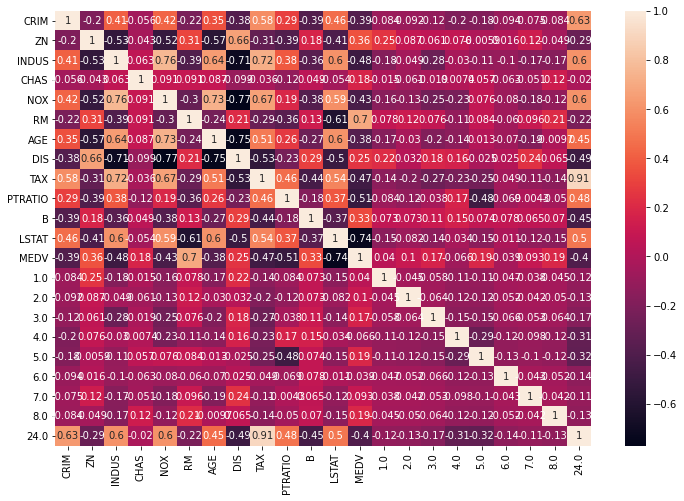

In [20]:
fig_dims = (12,8)
fig,ax = plt.subplots(figsize=fig_dims)
sn.heatmap(boston.corr(),annot=True, ax=ax)
plt.show()

In [21]:
abs(boston.corr()["MEDV"])

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
1.0        0.040453
2.0        0.104444
3.0        0.167352
4.0        0.065711
5.0        0.187356
6.0        0.039411
7.0        0.092802
8.0        0.190053
24.0       0.396297
Name: MEDV, dtype: float64

In [22]:
abs(boston.corr()["MEDV"][abs(boston.corr()["MEDV"])>0.5].drop('MEDV')).index.tolist()

['RM', 'PTRATIO', 'LSTAT']

CHecking which correlation values gives best RMSE and R_squared

In [24]:
vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
for val in vals:
    features = abs(boston.corr()["MEDV"][abs(boston.corr()["MEDV"])>val].drop('MEDV')).index.tolist()
    
    X = boston.drop(columns='MEDV')
    X=X[features]
    
    print(features)

    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
    print("R_squared: " + str(round(r2_score(y,y_pred),2)))


['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 2.0, 3.0, 5.0, 8.0, 24.0]
RMSE: 5.14
R_squared: 0.69
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 24.0]
RMSE: 4.42
R_squared: 0.77
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT', 24.0]
RMSE: 4.33
R_squared: 0.78
['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
RMSE: 4.28
R_squared: 0.78
['RM', 'PTRATIO', 'LSTAT']
RMSE: 4.3
R_squared: 0.78
['RM', 'LSTAT']
RMSE: 4.54
R_squared: 0.76
['LSTAT']
RMSE: 5.41
R_squared: 0.65


values at 0.4 and 0.5 are quite close:
* ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
    * RMSE: 4.28
    * R_squared: 0.78
* ['RM', 'PTRATIO', 'LSTAT']
    * RMSE: 4.3
    * R_squared: 0.78

We can choose ['RM', 'PTRATIO', 'LSTAT'] since it has number of smaller labels.

<h2>Feature Selection Using a Wrapper</h2>

this is sequencial feature selection. we use foword feature selection, adding features one at a time.

In [29]:
boston.columns

Index([   'CRIM',      'ZN',   'INDUS',    'CHAS',     'NOX',      'RM',
           'AGE',     'DIS',     'TAX', 'PTRATIO',       'B',   'LSTAT',
          'MEDV',       1.0,       2.0,       3.0,       4.0,       5.0,
             6.0,       7.0,       8.0,      24.0],
      dtype='object')

In [30]:
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston['MEDV'] = boston_data.target
boston['RAD'] = boston['RAD'].astype('category')

In [31]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
dummies = pd.get_dummies(boston.RAD)
boston = boston.drop(columns='RAD').merge(dummies,left_index=True,right_index=True)
X = boston.drop(columns='MEDV')
y = boston.MEDV

In [40]:
!pip install mlxtend

In [41]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

forward=False means backwards feature selection

In [42]:
sfs1 = SFS(classifier_pipeline,k_features=1,forward=False, scoring='neg_mean_squared_error',cv=cv)
X= boston.drop(columns='MEDV')
sfs1.fit(X,y)
sfs1.subsets_

{21: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20),
  'cv_scores': array([-48.59168039, -41.71460196, -26.77341373, -18.77266275,
         -17.19804314, -21.57217647, -20.388668  , -42.540924  ,
         -36.872014  , -15.978064  ]),
  'avg_score': -29.040224843137253,
  'feature_names': ('CRIM',
   'ZN',
   'INDUS',
   'CHAS',
   'NOX',
   'RM',
   'AGE',
   'DIS',
   'TAX',
   'PTRATIO',
   'B',
   'LSTAT',
   1.0,
   2.0,
   3.0,
   4.0,
   5.0,
   6.0,
   7.0,
   8.0,
   24.0)},
 20: {'feature_idx': (0,
   1,
   2,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20),
  'cv_scores': array([-50.55976078, -37.94587451, -25.38272745, -17.01997843,
         -12.40205882, -18.35837255, -15.604718  , -36.948534  ,
         -32.602062  , -14.400774  ]),
  'avg_score': -26.12248605490196,
  'feature_names': ('CRIM',
   'ZN',
  

choose the ave_score with highest value the this

In [44]:
X = boston.drop(columns='MEDV')[['CRIM','RM','PTRATIO','LSTAT']]
y = boston['MEDV']
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 4.102
R_squared: 0.801


`['CRIM','RM','AGE','DIS','TAX','B','LSTAT',6.0,24.0]` is the has the highest with 'avg_score': -15.315369952941177

In [50]:
boston[['CRIM','RM','AGE','DIS','TAX','B','LSTAT',6.0,24.0]]

,CRIM,RM,AGE,DIS,TAX,B,LSTAT,6.0,24.0
0,0.00632,6.575,65.2,4.0900,296.0,396.90,4.98,0,0
1,0.02731,6.421,78.9,4.9671,242.0,396.90,9.14,0,0
2,0.02729,7.185,61.1,4.9671,242.0,392.83,4.03,0,0
3,0.03237,6.998,45.8,6.0622,222.0,394.63,2.94,0,0
4,0.06905,7.147,54.2,6.0622,222.0,396.90,5.33,0,0
...,...,...,...,...,...,...,...,...,...
501,0.06263,6.593,69.1,2.4786,273.0,391.99,9.67,0,0
502,0.04527,6.120,76.7,2.2875,273.0,396.90,9.08,0,0
503,0.06076,6.976,91.0,2.1675,273.0,396.90,5.64,0,0
504,0.10959,6.794,89.3,2.3889,273.0,393.45,6.48,0,0


In [51]:
X = boston.drop(columns='MEDV')[['CRIM','RM','AGE','DIS','TAX','B','LSTAT',6.0,24.0]]
y = boston['MEDV']
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 3.914
R_squared: 0.818


In [45]:
boston[['CRIM','RM','PTRATIO','LSTAT','MEDV']].corr()

,CRIM,RM,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.219247,0.289946,0.455621,-0.388305
RM,-0.219247,1.000000,-0.355501,-0.613808,0.695360
PTRATIO,0.289946,-0.355501,1.000000,0.374044,-0.507787
LSTAT,0.455621,-0.613808,0.374044,1.000000,-0.737663
MEDV,-0.388305,0.695360,-0.507787,-0.737663,1.000000


LSTAT and RM has high correlation among them apart from MEDV, so we can add an interaction between them.

In [46]:
boston['RM*LSTAT']=boston['RM']*boston['LSTAT']

In [47]:
X = boston.drop(columns='MEDV')[['CRIM','RM','PTRATIO','LSTAT']]
y = boston['MEDV']
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 4.102
R_squared: 0.801


In [53]:
X = boston.drop(columns='MEDV')[['CRIM','RM','PTRATIO','LSTAT','RM*LSTAT']]
y = boston['MEDV']
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 4.078
R_squared: 0.803


Only a little improvement

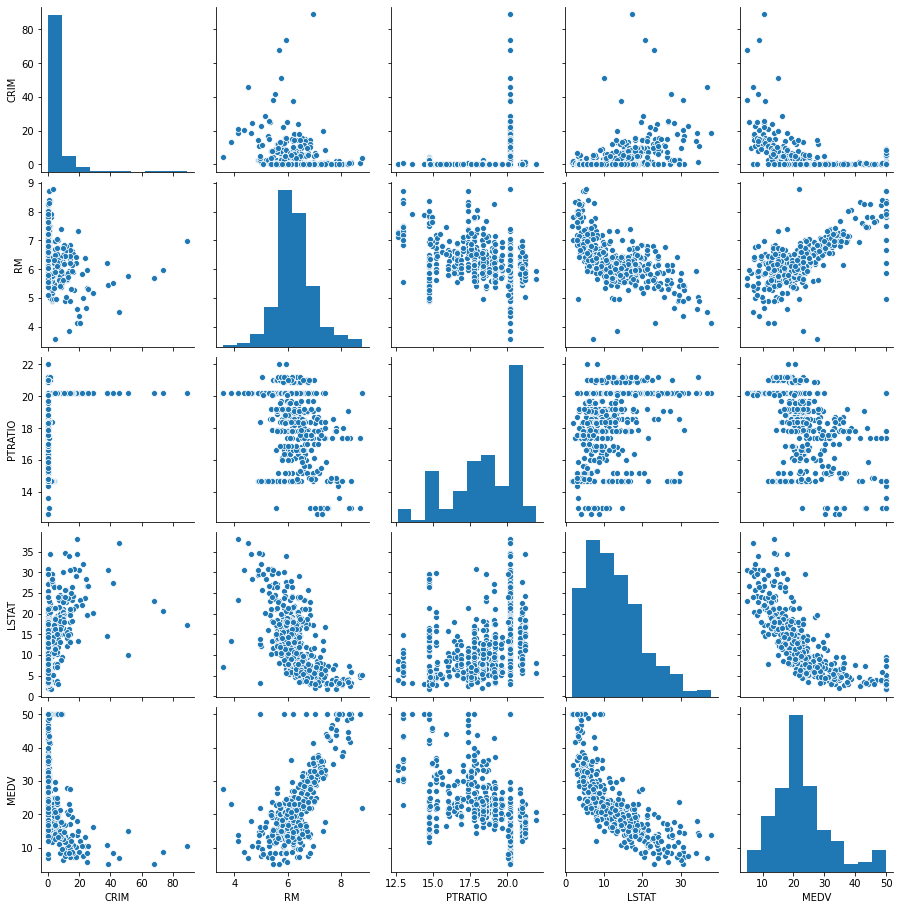

In [48]:
sn.pairplot(boston[['CRIM','RM','PTRATIO','LSTAT','MEDV']])

In [52]:
boston[['CRIM','RM','AGE','DIS','TAX','B','LSTAT',6.0,24.0]].corr()

,CRIM,RM,AGE,DIS,TAX,B,LSTAT,6.0,24.0
CRIM,1.000000,-0.219247,0.352734,-0.379670,0.582764,-0.385064,0.455621,-0.093806,0.632302
RM,-0.219247,1.000000,-0.240265,0.205246,-0.292048,0.128069,-0.613808,-0.059651,-0.222159
AGE,0.352734,-0.240265,1.000000,-0.747881,0.506456,-0.273534,0.602339,-0.069790,0.448516
DIS,-0.379670,0.205246,-0.747881,1.000000,-0.534432,0.291512,-0.496996,0.025432,-0.489642
TAX,0.582764,-0.292048,0.506456,-0.534432,1.000000,-0.441808,0.543993,-0.048868,0.909506
B,-0.385064,0.128069,-0.273534,0.291512,-0.441808,1.000000,-0.366087,0.078322,-0.446748
LSTAT,0.455621,-0.613808,0.602339,-0.496996,0.543993,-0.366087,1.000000,-0.011330,0.495285
6.0,-0.093806,-0.059651,-0.069790,0.025432,-0.048868,0.078322,-0.011330,1.000000,-0.138267
24.0,0.632302,-0.222159,0.448516,-0.489642,0.909506,-0.446748,0.495285,-0.138267,1.000000


Drop outliers

In [54]:
boston = boston.drop(boston[boston['MEDV']==boston['MEDV'].max()].index.tolist())

In [55]:
X = boston.drop(columns='MEDV')[['CRIM','RM','PTRATIO','LSTAT','RM*LSTAT']]
y = boston['MEDV']
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 3.295
R_squared: 0.824


This really improved the model with features `['CRIM','RM','PTRATIO','LSTAT','RM*LSTAT']`

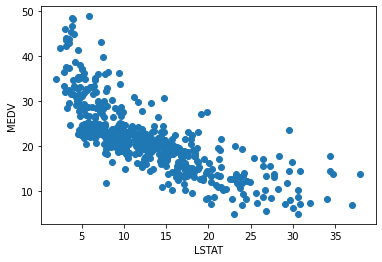

In [58]:
plt.scatter(boston['LSTAT'],boston['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

There is a non-linear relationship between dependent variable MEDV and independent variable LSTAT

In [59]:
boston['LSTAT_2']=boston['LSTAT']**2

In [60]:
X = boston.drop(columns='MEDV')[['CRIM','RM','PTRATIO','LSTAT','LSTAT_2']]
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 3.301
R_squared: 0.824


That is not good, because our RMSE slighly increased.

In [61]:
import mitosheet

It looks like Mito is incorrectly installed. To finish installing Mito, follow the documentation here: https://docs.trymito.io/


In [63]:
mitosheet.sheet()

MitoWidget(analysis_name='UUID-aacc18ac-356c-43ce-bb22-0e4695cf46db', code_json='{"imports": "from mitosheet i…